In [ ]:
# Install necessary libraries
!pip install transformers
!pip install sentence-transformers
!pip install scipy
!pip install scikit-learn
!pip install summarizer
!pip install bert-extractive-summarizer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.8/132.8 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.1/280.1 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for summarizer: filename=summarizer-0.0.7-py2.py3-none-any.whl size=284209 sha256=680f809d08050784df7e42e1b0f2cb972ce962577a565c2238a6a919814c5063
  Stored in directory: /root/.cache/pip/wheels/20/bb/2d/1fe057c2f729818a5f28c312c3667e8b9d5cfd4af4a39895e7
Successfully built summarizer


In [ ]:
# Import libraries
import torch
from transformers import RobertaModel, RobertaTokenizer
from sentence_transformers import SentenceTransformer
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Load pre-trained RoBERTa model and tokenizer
roberta_model = RobertaModel.from_pretrained("roberta-base")
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
# Load pre-trained Sentence Transformer model for semantic similarity
sentence_transformer_model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# Example post and comments
post_question = "What should I change in my room to look more aesthetic?"
# comments = [
#     "Consider adding some plants and changing the lighting.",
#     "I think a new paint color would make a big difference.",
#     "Why are you worried about aesthetics? It's not important.",
#     "Maybe you should rearrange your furniture for a fresh look.",
#     "Adding a rug and some wall art could enhance the aesthetic appeal."
# ]


comments = [
    "I’d get a solid colored pink and maybe green or yellow pillows with it but that’s just me!",
    "Totally! solid and a few colors seems like the safest and best bet. buy two or three sets of sheets and mix/match",
    "100% this. Solid sheets, solid comforter",
    "I would try for cream coloured sheets and comforter (basic, no pattern) with some pink and lime/yellow accent pillows. ETA - love the mural by the way!",
    "I’m a big proponent of all white sheets (bed sheet, duvet cover, pillow cases), so you can bleach them while washing, and accent throw pillows and blanket(s) on top. I’d go with soft blue pink and yellow tones for those.",
    "Seconding this, you can also get white sheets and comforter with just a thin blue piping around, it’ll really tie the room together",
    "So far I’m liking the blue. Teal would be good too, chambray or mixed blues. Add an accent pillow if you like but keep most of the bedding a background color so focus remains on the mural.",
    "I was really hoping that was wallpaper because I LOVE it.",
    "Cream/terra cotta pink. I’d definitely not involve another pattern, the beautiful mural does so much work making the place special.",
    "I'd go with white/cream for sheets/duvet and accent with pillow colors + throw blanket color from the mural. I think going with a dark color for your bedspread would be very overwhelming.",
    "I personally would go with a darker blue to match one the blue colors of the mural or match a lighter blue from the mural. I think if you go with another color like yellow or white your eyes go to the bed first whereas I would want the mural to be my feature. I'd definitely add on colorful throw pillows though like the peachy orange, pink, yellow, etc so the bed still pops.",
    "I think a light blue solid linen duvet with a little fabric texture to match the walls without overpowering it. And then, maybe similar colored sheets and/or light pink or citron to switch it up ¯\_(ツ)_/¯ BEAUTIFUL mural though, you painted it yourself?!",
    "Yellow with darker pillows",
    "Cream or light pink",
    "I’d go with a plain pale yellow",
    "Move all the furniture out of the room so you can stare at the masterpiece all day Seriously though I dream of owning a home one day so I can paint fun murals on the walls.",
    "Omg that mural! 🥰🥰🥰🥰🥰",
    "Baby blue baby",
    "Clearly you love color, so embrace it! I’d pick one of the mural accent colors (pink, yellow, green, etc.) for a comforter, another for your sheets and a combo of all (with accents of blue) on throw pillows. You can have so much fun with this, and should! edit: comma",
    "You could really lean-in to the maximalism here. A vibrant large floral print would look amazing.",
    "The mural is quite marine so maybe like a raw linen green or earthy colour style to make the bed feel like your own island in the water. Or light blue to make it your 'safe bubble'. Pink would work quite nicely too, a nice dry sandy warm pink colour.",
    "I know this sounds weird but I'd try a Coffee berry color. Match the vibrancy in the color. Use a solid. Try not to match a color in the wallpaper."
]

In [ ]:
# Step 1: Compute sentence embeddings using RoBERTa

def compute_embeddings(texts, model, tokenizer):
    inputs = tokenizer(texts, return_tensors="pt", padding=True, truncation=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    embeddings = outputs.last_hidden_state[:, 0, :]
    return embeddings

post_embedding = compute_embeddings(post_question, roberta_model, tokenizer)
comments_embeddings = compute_embeddings(comments, roberta_model, tokenizer)

In [ ]:
# Step 2: Calculate semantic similarity using Sentence Transformer model
semantic_similarities = torch.nn.functional.cosine_similarity(post_embedding, comments_embeddings, dim=1)

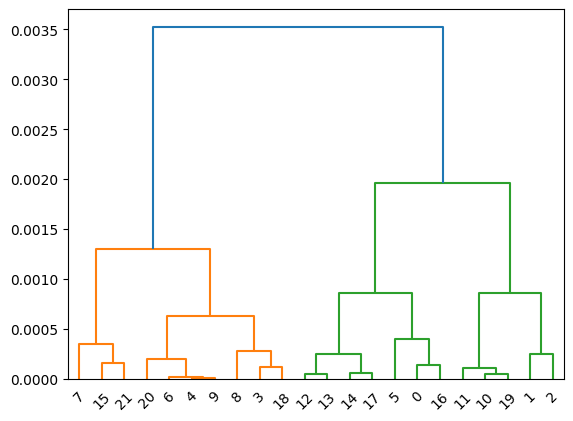

In [ ]:
#Step 3: Agglomerative clustering based on semantic similarit

import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

# Reshape semantic similarities for linkage
semantic_similarities_np = 1 - semantic_similarities.detach().numpy()
semantic_similarities_reshaped = np.reshape(semantic_similarities_np, (len(semantic_similarities_np), 1))

# Perform agglomerative clustering
linkage_matrix = linkage(semantic_similarities_reshaped, method='complete', metric='euclidean')

# Plot the dendrogram (optional, for visualization purposes)
dendrogram(linkage_matrix)
plt.show()

# Use fcluster to get cluster assignments
threshold = 0.5  # Adjust the threshold based on the dendrogram or experiment
clusters = fcluster(linkage_matrix, t=threshold, criterion='distance')

In [ ]:
# Step 4: Identify relevant comments based on cluster size
def get_relevant_comments(comments, clusters, min_cluster_size=2):
    relevant_comments = []
    for cluster_id in set(clusters):
        cluster_indices = [i for i, cluster in enumerate(clusters) if cluster == cluster_id]
        if len(cluster_indices) >= min_cluster_size:
            relevant_comments.extend([comments[i] for i in cluster_indices])
    return relevant_comments

relevant_comments = get_relevant_comments(comments, clusters)

# Print relevant comments
print("Relevant Comments:")
for comment in relevant_comments:
    print(comment)

Relevant Comments:
I’d get a solid colored pink and maybe green or yellow pillows with it but that’s just me!
Totally! solid and a few colors seems like the safest and best bet. buy two or three sets of sheets and mix/match
100% this. Solid sheets, solid comforter
I would try for cream coloured sheets and comforter (basic, no pattern) with some pink and lime/yellow accent pillows. ETA - love the mural by the way!
I’m a big proponent of all white sheets (bed sheet, duvet cover, pillow cases), so you can bleach them while washing, and accent throw pillows and blanket(s) on top. I’d go with soft blue pink and yellow tones for those.
Seconding this, you can also get white sheets and comforter with just a thin blue piping around, it’ll really tie the room together
So far I’m liking the blue. Teal would be good too, chambray or mixed blues. Add an accent pillow if you like but keep most of the bedding a background color so focus remains on the mural.
I was really hoping that was wallpaper be

In [ ]:
def saliency_scoring(post_embedding, comments_embeddings, comments, model):
    scores = []
    for i, comment_embedding in enumerate(comments_embeddings):
        # Calculate the saliency score based on the mean of cosine similarities
        saliency_score = torch.nn.functional.cosine_similarity(post_embedding, comment_embedding, dim=0).mean().item()
        scores.append((comments[i], saliency_score))

    # Sort comments based on saliency scores in descending order
    sorted_comments = [comment for comment, _ in sorted(scores, key=lambda x: x[1], reverse=True)]
    return sorted_comments

# Get saliency-scored comments
saliency_scored_comments = saliency_scoring(post_embedding, comments_embeddings, comments, roberta_model)

print("\nDesired Output:")
for comment in saliency_scored_comments:
    print(comment)


Desired Output:
I’d get a solid colored pink and maybe green or yellow pillows with it but that’s just me!
I’d go with a plain pale yellow
I'd go with white/cream for sheets/duvet and accent with pillow colors + throw blanket color from the mural. I think going with a dark color for your bedspread would be very overwhelming.
I think a light blue solid linen duvet with a little fabric texture to match the walls without overpowering it. And then, maybe similar colored sheets and/or light pink or citron to switch it up ¯\_(ツ)_/¯ BEAUTIFUL mural though, you painted it yourself?!
So far I’m liking the blue. Teal would be good too, chambray or mixed blues. Add an accent pillow if you like but keep most of the bedding a background color so focus remains on the mural.
I would try for cream coloured sheets and comforter (basic, no pattern) with some pink and lime/yellow accent pillows. ETA - love the mural by the way!
I was really hoping that was wallpaper because I LOVE it.
Cream or light pin

In [ ]:
# Provided list of desired comments
desired_comments = [
    "I’d get a solid colored pink and maybe green or yellow pillows with it but that’s just me!",
    "I’d go with a plain pale yellow",
    "I'd go with white/cream for sheets/duvet and accent with pillow colors + throw blanket color from the mural. I think going with a dark color for your bedspread would be very overwhelming.",
    "I think a light blue solid linen duvet with a little fabric texture to match the walls without overpowering it. And then, maybe similar colored sheets and/or light pink or citron to switch it up ¯\_(ツ)_/¯ BEAUTIFUL mural though, you painted it yourself?!",
    "So far I’m liking the blue. Teal would be good too, chambray or mixed blues. Add an accent pillow if you like but keep most of the bedding a background color so focus remains on the mural.",
    "I would try for cream coloured sheets and comforter (basic, no pattern) with some pink and lime/yellow accent pillows. ETA - love the mural by the way!",
    "I was really hoping that was wallpaper because I LOVE it.",
    "Cream or light pink",
    "Clearly you love color, so embrace it! I’d pick one of the mural accent colors (pink, yellow, green, etc.) for a comforter, another for your sheets and a combo of all (with accents of blue) on throw pillows. You can have so much fun with this, and should! edit: comma",
    "Seconding this, you can also get white sheets and comforter with just a thin blue piping around, it’ll really tie the room together",
    "I personally would go with a darker blue to match one the blue colors of the mural or match a lighter blue from the mural. I think if you go with another color like yellow or white your eyes go to the bed first whereas I would want the mural to be my feature. I'd definitely add on colorful throw pillows though like the peachy orange, pink, yellow, etc so the bed still pops.",
    "Omg that mural! 🥰🥰🥰🥰🥰",
    "Yellow with darker pillows",
    "I’m a big proponent of all white sheets (bed sheet, duvet cover, pillow cases), so you can bleach them while washing, and accent throw pillows and blanket(s) on top. I’d go with soft blue pink and yellow tones for those.",
    "Baby blue baby",
    "I know this sounds weird but I'd try a Coffee berry color. Match the vibrancy in the color. Use a solid. Try not to match a color in the wallpaper."
]

# Actual list of comments
comments = [
    "I’d get a solid colored pink and maybe green or yellow pillows with it but that’s just me!",
    "Totally! solid and a few colors seems like the safest and best bet. buy two or three sets of sheets and mix/match",
    "100% this. Solid sheets, solid comforter",
    "I would try for cream coloured sheets and comforter (basic, no pattern) with some pink and lime/yellow accent pillows. ETA - love the mural by the way!",
    "I’m a big proponent of all white sheets (bed sheet, duvet cover, pillow cases), so you can bleach them while washing, and accent throw pillows and blanket(s) on top. I’d go with soft blue pink and yellow tones for those.",
    "Seconding this, you can also get white sheets and comforter with just a thin blue piping around, it’ll really tie the room together",
    "So far I’m liking the blue. Teal would be good too, chambray or mixed blues. Add an accent pillow if you like but keep most of the bedding a background color so focus remains on the mural.",
    "I was really hoping that was wallpaper because I LOVE it.",
    "Cream/terra cotta pink. I’d definitely not involve another pattern, the beautiful mural does so much work making the place special.",
    "I'd go with white/cream for sheets/duvet and accent with pillow colors + throw blanket color from the mural. I think going with a dark color for your bedspread would be very overwhelming.",
    "I personally would go with a darker blue to match one the blue colors of the mural or match a lighter blue from the mural. I think if you go with another color like yellow or white your eyes go to the bed first whereas I would want the mural to be my feature. I'd definitely add on colorful throw pillows though like the peachy orange, pink, yellow, etc so the bed still pops.",
    "I think a light blue solid linen duvet with a little fabric texture to match the walls without overpowering it. And then, maybe similar colored sheets and/or light pink or citron to switch it up ¯\_(ツ)_/¯ BEAUTIFUL mural though, you painted it yourself?!",
    "Yellow with darker pillows",
    "Cream or light pink",
    "I’d go with a plain pale yellow",
    "Move all the furniture out of the room so you can stare at the masterpiece all day Seriously though I dream of owning a home one day so I can paint fun murals on the walls.",
    "Omg that mural! 🥰🥰🥰🥰🥰",
    "Baby blue baby",
    "Clearly you love color, so embrace it! I’d pick one of the mural accent colors (pink, yellow, green, etc.) for a comforter, another for your sheets and a combo of all (with accents of blue) on throw pillows. You can have so much fun with this, and should! edit: comma",
    "You could really lean-in to the maximalism here. A vibrant large floral print would look amazing.",
    "The mural is quite marine so maybe like a raw linen green or earthy colour style to make the bed feel like your own island in the water. Or light blue to make it your 'safe bubble'. Pink would work quite nicely too, a nice dry sandy warm pink colour.",
    "I know this sounds weird but I'd try a Coffee berry color. Match the vibrancy in the color. Use a solid. Try not to match a color in the wallpaper."
]

# Identify common comments in both lists
common_comments = set(desired_comments).intersection(comments)

# Identify comments in the actual list but not in the desired list
additional_comments = set(comments) - set(desired_comments)

# Print the results
print("Comments in both lists:")
for comment in common_comments:
    print(comment)

print("\nComments in actual list but not in desired list:")
for comment in additional_comments:
    print(comment)


Comments in both lists:
Baby blue baby
Omg that mural! 🥰🥰🥰🥰🥰
I'd go with white/cream for sheets/duvet and accent with pillow colors + throw blanket color from the mural. I think going with a dark color for your bedspread would be very overwhelming.
So far I’m liking the blue. Teal would be good too, chambray or mixed blues. Add an accent pillow if you like but keep most of the bedding a background color so focus remains on the mural.
I think a light blue solid linen duvet with a little fabric texture to match the walls without overpowering it. And then, maybe similar colored sheets and/or light pink or citron to switch it up ¯\_(ツ)_/¯ BEAUTIFUL mural though, you painted it yourself?!
I’m a big proponent of all white sheets (bed sheet, duvet cover, pillow cases), so you can bleach them while washing, and accent throw pillows and blanket(s) on top. I’d go with soft blue pink and yellow tones for those.
Cream or light pink
I’d go with a plain pale yellow
I know this sounds weird but I'd t

In [ ]:
import warnings
from nltk.tokenize import sent_tokenize
from summarizer import Summarizer

def saliency_scoring(post_embedding, comments_embeddings, comments, model):
    scores = []
    for i, comment_embedding in enumerate(comments_embeddings):
        # Calculate the saliency score based on the mean of cosine similarities
        saliency_score = torch.nn.functional.cosine_similarity(post_embedding, comment_embedding, dim=0).mean().item()
        scores.append((comments[i], saliency_score))

    # Sort comments based on saliency scores in descending order
    sorted_comments = [comment for comment, _ in sorted(scores, key=lambda x: x[1], reverse=True)]
    return sorted_comments

# Get saliency-scored comments
saliency_scored_comments = saliency_scoring(post_embedding, comments_embeddings, comments, roberta_model)

# Combine relevant comments into a single text
relevant_text = ' '.join(saliency_scored_comments)

# Suppress sklearn warning
warnings.filterwarnings("ignore", category=FutureWarning)

summarizer = Summarizer()
extractive_summary = summarizer(relevant_text, ratio=0.2)

# Print the extractive summary
print("\nExtractive Summary:")
print(extractive_summary)

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]


Extractive Summary:
I’d get a solid colored pink and maybe green or yellow pillows with it but that’s just me! I’d go with a plain pale yellow I'd go with white/cream for sheets/duvet and accent with pillow colors + throw blanket color from the mural. And then, maybe similar colored sheets and/or light pink or citron to switch it up ¯\_(ツ)_/¯ BEAUTIFUL mural though, you painted it yourself?! Add an accent pillow if you like but keep most of the bedding a background color so focus remains on the mural. for a comforter, another for your sheets and a combo of all (with accents of blue) on throw pillows. I’d go with soft blue pink and yellow tones for those.


In [ ]:
!pip install rouge


In [ ]:
from rouge import Rouge

# Reference summary
reference_summary = "The OP wanted to know which bed sheets would look best in their bedroom that has a blue and yellow full wall mural behind the bed. \nOne user suggested using cream colored sheets and pink and lime throw pillows. \nAnother user suggested having all white sheets and blankets for easy cleaning with bleach. \nSeveral users suggested different shades of blue for the bedding. \nOne commenter suggested picking accent colors from the mural and using those for bedding. \nMost commenters recommended getting solid sheets, a solid comforter and colorful throw pillows, and discussed whether the artwork was wallpaper or a mural.\nOne user suggested subtle colors, like pale yellow, white or green. \nA few commenters complimented the mural. \nAnother commenter proposed getting a bright floral print comforter."

# Generated summary
generated_summary = "I’d get a solid colored pink and maybe green or yellow pillows with it but that’s just me! I’d go with a plain pale yellow I'd go with white/cream for sheets/duvet and accent with pillow colors + throw blanket color from the mural. And then, maybe similar colored sheets and/or light pink or citron to switch it up ¯\_(ツ)_/¯ BEAUTIFUL mural though, you painted it yourself?! Add an accent pillow if you like but keep most of the bedding a background color so focus remains on the mural. for a comforter, another for your sheets and a combo of all (with accents of blue) on throw pillows. I’d go with soft blue pink and yellow tones for those."

# Initialize the Rouge object
rouge = Rouge()

# Compute ROUGE scores
rouge_scores = rouge.get_scores(generated_summary, reference_summary, avg=True)

# Print ROUGE scores
print(f"ROUGE-1 Score: {rouge_scores['rouge-1']['f'] * 100}")
print(f"ROUGE-2 Score: {rouge_scores['rouge-2']['f'] * 100}")
print(f"ROUGE-L Score: {rouge_scores['rouge-l']['f'] * 100}")

ROUGE-1 Score: 32.298136147525184
ROUGE-2 Score: 7.758620190249735
ROUGE-L Score: 26.08695602330158
